In [6]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 2024 images 
im1 = cv2.imread('/Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/task_3_image_1.png')
im2 = cv2.imread('/Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/task_3_image_2.png')


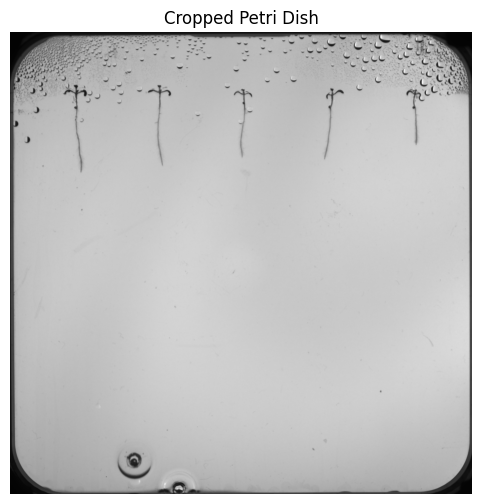

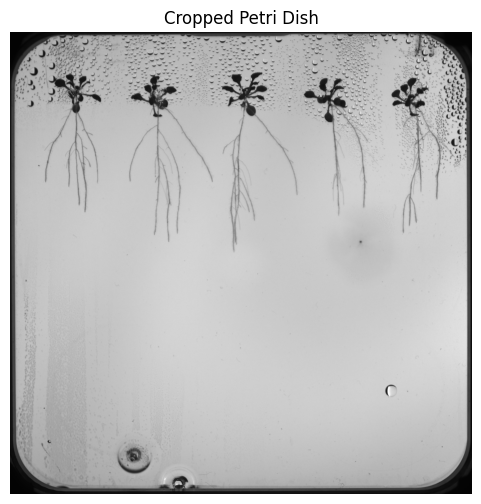

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    gray = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY_INV, 11, 2)
    gray = cv2.equalizeHist(gray)
    return gray, image

def detect_edges(gray):
    edges = cv2.Canny(gray, 50, 150) 
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))  
    return edges

def find_largest_bounding_box(edges, image_shape, min_size_ratio=0.3):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_area = 0
    best_bbox = None
    min_width, min_height = min_size_ratio * image_shape[1], min_size_ratio * image_shape[0]

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        if area > max_area and w >= min_width and h >= min_height:
            max_area = area
            best_bbox = (x, y, w, h)
    
    return best_bbox

def crop_to_square(image, bbox, padding=5):
    x, y, w, h = bbox
    size = max(w, h)  
    
    # Center crop around the bounding box
    cx, cy = x + w // 2, y + h // 2
    x1 = max(0, cx - size // 2)
    y1 = max(0, cy - size // 2)
    x2 = min(image.shape[1], x1 + size)
    y2 = min(image.shape[0], y1 + size)

    # Crop the image
    return image[y1:y2, x1:x2]

def crop_and_display(image, expected_bbox=None):
    gray, original = preprocess_image(image)
    edges = detect_edges(gray)
    bbox = find_largest_bounding_box(edges, gray.shape, min_size_ratio=0.2)  
    
    if bbox:
        cropped = crop_to_square(original, bbox, padding=30)  
        # Display the cropped Petri dish
        plt.figure(figsize=(6, 6))
        plt.title("Cropped Petri Dish")
        plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()
    else:
        print("No bounding box detected.")
        
# Example usage:
im1 = cv2.imread('/Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/task_3_image_1.png')
im2 = cv2.imread('/Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/task_3_image_2.png')

# Crop and display the first image
crop_and_display(im1)

# Crop and display the second image
crop_and_display(im2)


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    gray = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY_INV, 11, 2)
    gray = cv2.equalizeHist(gray)
    return gray, image

def detect_edges(gray):
    edges = cv2.Canny(gray, 50, 150) 
    edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))  
    return edges

def find_largest_bounding_box(edges, image_shape, min_size_ratio=0.3):
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_area = 0
    best_bbox = None
    min_width, min_height = min_size_ratio * image_shape[1], min_size_ratio * image_shape[0]

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        if area > max_area and w >= min_width and h >= min_height:
            max_area = area
            best_bbox = (x, y, w, h)
    
    return best_bbox

def crop_to_square(image, bbox, padding=50):
    x, y, w, h = bbox
    size = max(w, h)  
    
    # Center crop around the bounding box
    cx, cy = x + w // 2, y + h // 2
    x1 = max(0, cx - size // 2)
    y1 = max(0, cy - size // 2)
    x2 = min(image.shape[1], x1 + size)
    y2 = min(image.shape[0], y1 + size)

    # Crop the image
    return image[y1:y2, x1:x2]

def crop_and_save(image, output_path, expected_bbox=None):
    gray, original = preprocess_image(image)
    edges = detect_edges(gray)
    bbox = find_largest_bounding_box(edges, gray.shape, min_size_ratio=0.2)  
    
    if bbox:
        cropped = crop_to_square(original, bbox, padding=80)  
        # Save the cropped image to the specified path
        cv2.imwrite(output_path, cropped)
        print(f"Cropped Petri dish saved as {output_path}")
    else:
        print("No bounding box detected, image not saved.")
        
# Example usage:
im1 = cv2.imread('/Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/task_3_image_1.png')
im2 = cv2.imread('/Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/task_3_image_2.png')

# Save the cropped Petri dish from the first image
crop_and_save(im1, '/Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/cropped_image_1.png')

# Save the cropped Petri dish from the second image
crop_and_save(im2, '/Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/cropped_image_2.png')


Cropped Petri dish saved as /Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/cropped_image_1.png
Cropped Petri dish saved as /Users/celinewu/Documents/GitHub/2024-25b-fai2-adsai-CelineWu231265/datalab_tasks/task3/cropped_image_2.png
